<a href="https://colab.research.google.com/github/sinyoung0110/webcrawling/blob/main/2025_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_4W_webcrawlling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import datetime
import numpy as np

In [2]:
# 수집하고 싶은 주식 종목 코드, 조회기간, csv 저장 여부를 입력받음
ticker=input("종목 코드를 입력하세요 (예: 005930.KS): ")
start_date_str=input("조회 시작일을 입력하세요 (예: 2022-01-01): ")
end_date_str=input("조회 종료일을 입력하세요 (예: 2022-12-31): ")
save_csv=input("csv 파일로 저장하시겠습니까? (예: yes): ").lower()=='y'

종목 코드를 입력하세요 (예: 005930.KS): 005930.KS
조회 시작일을 입력하세요 (예: 2022-01-01): 2022-01-01
조회 종료일을 입력하세요 (예: 2022-12-31): 2022-12-31
csv 파일로 저장하시겠습니까? (예: yes): y


In [3]:
#입력한 시작일과 종료일을 타임스탬프(초 단위 숫자)로 변환
#Yahoo Finance의 요청 URL에 사용하기 위한 처리

start_timestamp=int(datetime.datetime.strptime(start_date_str, "%Y-%m-%d").timestamp())

if end_date_str=="-1":
  end_date=datetime.datetime.today()
  end_date_str=end_date.strftime("%Y-%m-%d")
else:
   end_date=datetime.datetime.strptime(end_date_str, "%Y-%m-%d")

end_timestamp=int(end_date.timestamp())


In [4]:
#야후 파라미터 설정
stock_url=f"https://finance.yahoo.com/quote/{ticker}/history"

params={
    'period1':start_timestamp,
    'period2':end_timestamp,
    'interval':'1d',
    'filter':'history',
    'frequency':'1d',
    'includeAdjustedClose':'true'
}
headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 ",
    "Accept-Language":"en-US,en;q=0.9",
    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Referer":"https://www.google.com/"
}
# 최종 요청 전송
response=requests.get(stock_url,headers=headers,params=params)

In [8]:
tables=pd.read_html(StringIO(str(response.text)))
stock_data=tables[0]

stock_data.columns=['Date','Open','High','Low','Close','Adj Close','Volume']

stock_data['Date']=pd.to_datetime(stock_data['Date'],errors='coerce')

stock_data=stock_data[~stock_data['Close'].astype(str).str.contains("Dividend")]

stock_data['Close']=stock_data['Close'].astype(str).str.extract(r'([\d,.]+)')[0]
stock_data['Close']=stock_data['Close'].str.replace(',','',regex=False).astype(float)

stock_data=stock_data.dropna()
stock_data=stock_data.sort_values(by='Date')

<ipython-input-8-0b477cf5e75e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Close']=stock_data['Close'].astype(str).str.extract(r'([\d,.]+)')[0]
<ipython-input-8-0b477cf5e75e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Close']=stock_data['Close'].str.replace(',','',regex=False).astype(float)


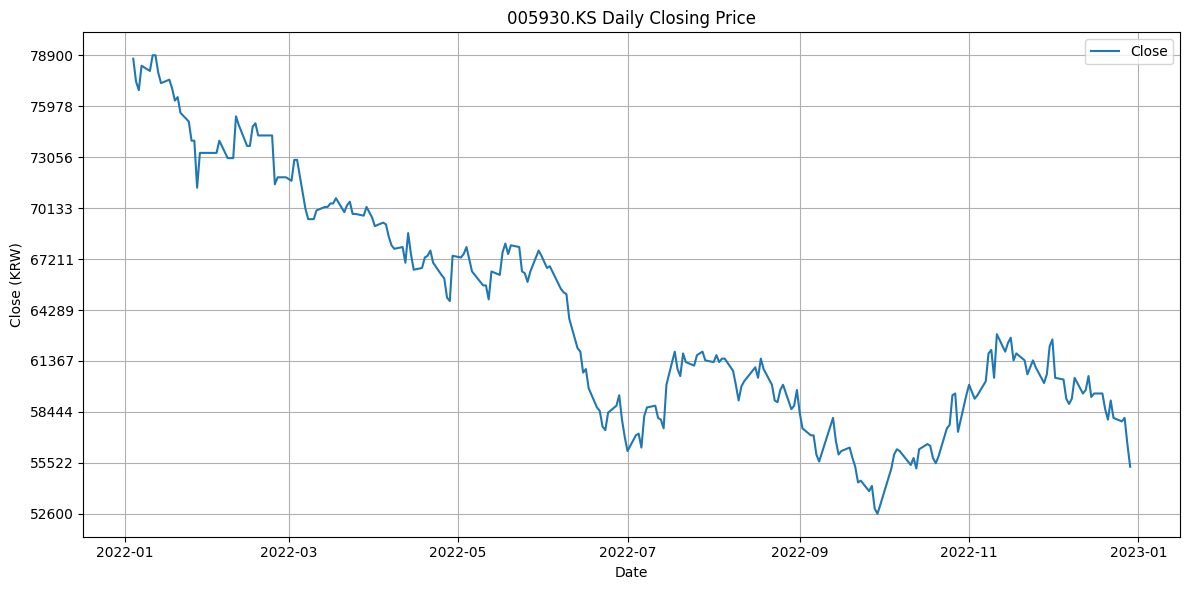

In [9]:
plt.figure(figsize=(12,6))

plt.plot(stock_data['Date'],stock_data['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Close (KRW)')
plt.title(f'{ticker} Daily Closing Price')

plt.grid(True)
plt.legend()

plt.ticklabel_format(style='plain',axis='y')

min_price=int(stock_data['Close'].min())
max_price=int(stock_data['Close'].max())
y_ticks=np.linspace(min_price,max_price,10)
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()

In [10]:
if save_csv:
  filename=f"{ticker}_{start_date_str}_to_{end_date_str}.csv"

  stock_data.to_csv(filename, index=False,encoding='utf-8-sig')

  print(f"CSV 파일로 저장 완료 : {filename}")

CSV 파일로 저장 완료 : 005930.KS_2022-01-01_to_2022-12-31.csv


## colab 구글 드라이브

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!pip install selenium

!apt-get update

!apt install chromium-chromedriver

!pip install chromedriver-autoinstaller

#아래는 드라이브에  chromedriver를 복사할 때 사용하는 코드(최초 1회만 실행하면 됨)
#!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 30.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu ja

In [45]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import urllib.request
from urllib.request import urlretrieve
import os
import sys
import time

import pandas as pd

import chromedriver_autoinstaller

# expected_conditions (EC):특정 조건이 충족될 때까지 기다리는데 사용(ex: 어떤 요소가 클릭 가능해질 때까지)

In [46]:
chrome_path="/content/drive/MyDrive/Colab Notebooks/chromedriver"

In [47]:
sys.path.insert(0, chrome_path)

chrome_options=webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('lang-ko_KR')

chromedriver_autoinstaller.install()

In [48]:
def selenium_scroll_options():
  SCROLL_PAUSE_SEC=10

  last_height=driver.execute_script("return document.body.scrollHeight")

  while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(SCROLL_PAUSE_SEC)

    new_height=driver.execute_script("return document.body.scrollHeight")

    if new_height==last_height:
      break
    last_height=new_height

In [49]:
url="https://www.google.com/"

driver=webdriver.Chrome(options=chrome_options)

In [50]:
driver.get(url)
driver.implicitly_wait(10)
driver.get_screenshot_as_file('google_screen.png')

driver.close()
print(driver)

<selenium.webdriver.chrome.webdriver.WebDriver (session="f3165cb457d359de82e48aa5fba71538")>


In [51]:
my_path="/content/drive/MyDrive/Colab Notebooks/collected_images/"

In [52]:
base_url="https://www.google.co.kr/imghp?hl=ko"
keyword=input("검색할 키워드를 입력:")
image_name=input("저장할 이미지 이름 : ")

driver=webdriver.Chrome(options=chrome_options)
driver.get(base_url)

browser=driver.find_element(By.NAME,'q')
browser.clear()
browser.send_keys(keyword)
browser.send_keys(Keys.RETURN)

selenium_scroll_options()

images=driver.find_elements(By.CSS_SELECTOR, "img.YQ4gaf")
images_url=[]

검색할 키워드를 입력:보더콜리
저장할 이미지 이름 : smart_dog


In [53]:
for i in images:
  src=i.get_attribute('src')or i.get_attribute('data-src')
  if src:
    images_url.append(src)
driver.close()

images_df=pd.DataFrame(images_url,columns=["url"])
images_url=images_df["url"].unique()

print("전체 다운로드한 이미지 개수: ", len(images_df))
print("동일한 이미지를 제거한 이미지 개수:", len(images_url))

save_folder=os.path.join(my_path,image_name)
os.makedirs(save_folder,exist_ok=True)

for t, url in enumerate(images_url):
  try:
    urlretrieve(url,os.path.join(save_folder,f"{image_name}_{t}.jpg"))
  except Exception as e:
    print(f"[{t}] 다운로드 실패 : {e}")

전체 다운로드한 이미지 개수:  1749
동일한 이미지를 제거한 이미지 개수: 1036
[179] 다운로드 실패 : HTTP Error 404: Not Found
[199] 다운로드 실패 : HTTP Error 404: Not Found
[227] 다운로드 실패 : HTTP Error 404: Not Found
[370] 다운로드 실패 : HTTP Error 404: Not Found
[442] 다운로드 실패 : HTTP Error 404: Not Found
[448] 다운로드 실패 : HTTP Error 404: Not Found
[574] 다운로드 실패 : HTTP Error 404: Not Found
[822] 다운로드 실패 : HTTP Error 404: Not Found


In [54]:
driver.quit()